# Exercise W1 L2

In [1]:
# imports
import numpy as np
from scipy.ndimage import uniform_filter1d
from matplotlib import pyplot as plt
import pandas

from statsmodels.tsa.seasonal import seasonal_decompose

# Matrices

## 1. Create a vector with 10 values (you choose) with the function “c”.

In [2]:
vec = np.arange(10)
vec

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## 2. Build a 4×3 matrix with ones everywhere (using “matrix”).

In [3]:
matrix = np.ones((4,3))
matrix

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

## 3. Build a 4×3 matrix, assigned to variable A, with the numbers 1 through 3 in each column.


In [4]:
A = np.outer(np.arange(3)+1, np.ones(4))
A[:,0]

array([1., 2., 3.])

## 4. Build a 4x3 matrix, assigned to B, with the numbers 1 to 4 in each row. 

In [5]:
B = np.outer(np.ones(3), np.arange(4)+1)
B[0,:]

array([1., 2., 3., 4.])

## 5. Extract the elements in the 1st and 2nd rows and 1st and 2nd columns of matrix A created above and assign to matrix S (you’ll have a 2×2 matrix).


In [6]:
S = A[0:2,0:2]
S

array([[1., 1.],
       [2., 2.]])

## 6. Build a 2x2 matrix filled with NAs.

In [7]:
NaNs = np.ones((2,2)) * np.nan
NaNs

array([[nan, nan],
       [nan, nan]])

----

# Decomposition

## https://towardsdatascience.com/time-series-decomposition-in-python-8acac385a5b2 

## 7. Download the file "ch4_mm_gl.txt" (in week 1 module materials) onto your working directory for this class. Make sure to set the working directory to this folder and import the data using “read.table”. This dataset has 7 columns (variables) and 461 observations.

## Load data

In [8]:
ch4 = pandas.read_table('../Data/ch4_mm_gl.txt', delim_whitespace=True)

In [9]:
ch4.head()

,year,month,decimal,average,average_unc,trend,trend_unc
0,1983,7,1983.542,1625.9,2.3,1634.8,1.5
1,1983,8,1983.625,1628.1,2.9,1635.3,1.4
2,1983,9,1983.708,1638.4,2.3,1635.9,1.3
3,1983,10,1983.792,1644.8,1.4,1636.5,1.2
4,1983,11,1983.875,1642.6,0.8,1637.2,1.2


## 8. Extract the ch4 monthly mean (fourth column named $average) in the dataset downloaded above. Assign to a variable.


In [10]:
mmean = ch4.average
mmean

0      1625.9
1      1628.1
2      1638.4
3      1644.8
4      1642.6
        ...  
456    1886.6
457    1892.8
458    1902.8
459    1908.5
460    1909.3
Name: average, Length: 461, dtype: float64

## 9. Turn the ch4 monthly mean into a time series object using function “ts” (this is monthly data so frequency =12).



### Generate datetime

### https://towardsdatascience.com/how-to-iterate-over-rows-in-a-pandas-dataframe-6aa173fc6c84 

In [11]:
dates = []
for index, row in ch4.iterrows():
    dates.append(f'{int(row.year)}-{int(row.month)}')
dates = pandas.to_datetime(dates)
ch4['date'] = dates
ch4.set_index('date', inplace=True)
ch4.head()

,year,month,decimal,average,average_unc,trend,trend_unc
date,,,,,,,
1983-07-01,1983,7,1983.542,1625.9,2.3,1634.8,1.5
1983-08-01,1983,8,1983.625,1628.1,2.9,1635.3,1.4
1983-09-01,1983,9,1983.708,1638.4,2.3,1635.9,1.3
1983-10-01,1983,10,1983.792,1644.8,1.4,1636.5,1.2
1983-11-01,1983,11,1983.875,1642.6,0.8,1637.2,1.2


## 10. Plot the data using “plot.ts”. Make sure to label axes appropriately. 

<AxesSubplot:xlabel='date', ylabel='Monthly Mean'>

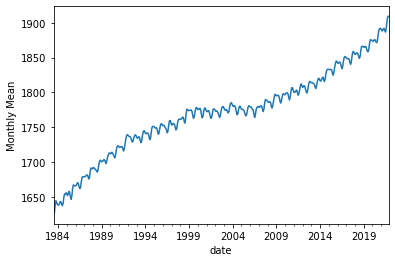

In [12]:
ch4.average.plot(ylabel='Monthly Mean')

## 11. Using the function “decompose”, perform a classical decomposition of the monthly mean ch4 data and plot all components.

In [13]:
result=seasonal_decompose(ch4['average'], model='additive', period=12)

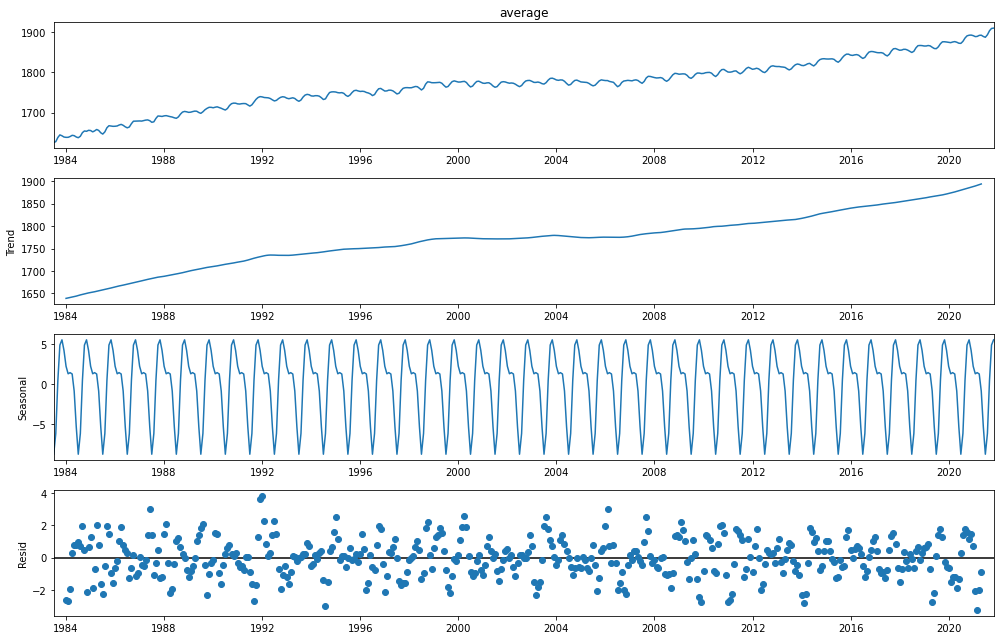

In [14]:
fig = result.plot()
fig.set_size_inches((14, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

## 12. Apply a moving average filter to the ch4 monthly time series using the function “filter”.


In [15]:
filt_data = uniform_filter1d(ch4.average, size=7)
filt_data[0:5]

array([1632.8       , 1633.4       , 1635.02857143, 1636.85714286,
       1638.7       ])

In [16]:
ch4['filtered'] = filt_data

## 13. Compare the trend obtained by “filter” to the trend obtained by “decompose”.

<Figure size 432x288 with 0 Axes>

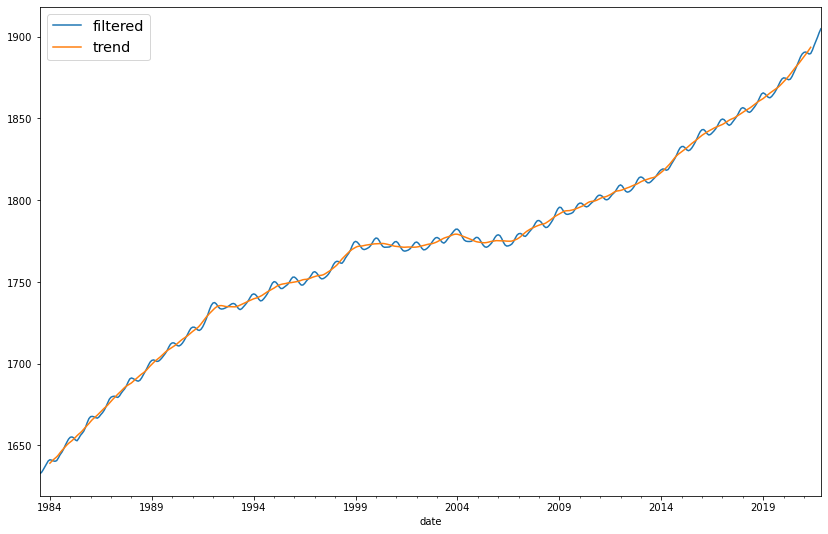

In [17]:
plt.clf()
fig = plt.figure()
ax = plt.gca()
_ = ch4.filtered.plot(label='filtered')
result.trend.plot(label='trend')
ax.legend(fontsize='x-large')
fig.set_size_inches((14, 9))
plt.show()

----

# CO2

## Load

In [18]:
co2 = pandas.read_csv('../Data/co2_mm_mlo.csv')
co2.head()

,year,month,decimal date,average
0,1958,3,1958.2027,315.70
1,1958,4,1958.2877,317.45
2,1958,5,1958.3699,317.51
3,1958,6,1958.4548,317.24
4,1958,7,1958.5370,315.86


## Dates

In [19]:
dates = []
for index, row in co2.iterrows():
    dates.append(f'{int(row.year)}-{int(row.month)}')
dates = pandas.to_datetime(dates)
co2['date'] = dates
co2.set_index('date', inplace=True)
co2.head()

,year,month,decimal date,average
date,,,,
1958-03-01,1958,3,1958.2027,315.70
1958-04-01,1958,4,1958.2877,317.45
1958-05-01,1958,5,1958.3699,317.51
1958-06-01,1958,6,1958.4548,317.24
1958-07-01,1958,7,1958.5370,315.86


## Plot

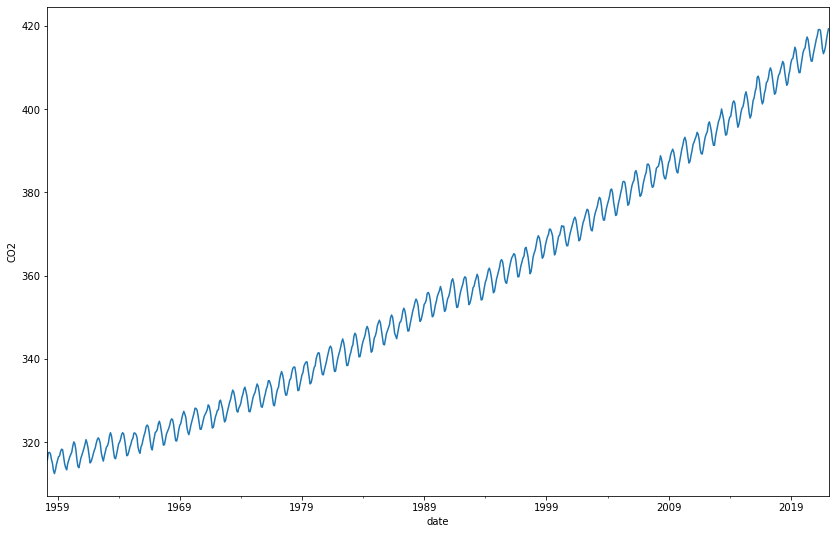

In [20]:
fig = plt.figure()
plt.clf()
ax = plt.gca()
co2.average.plot(ylabel='CO2')
fig.set_size_inches((14, 9))
plt.show()

## Decompose

In [21]:
result2=seasonal_decompose(co2.average, model='additive', period=12)

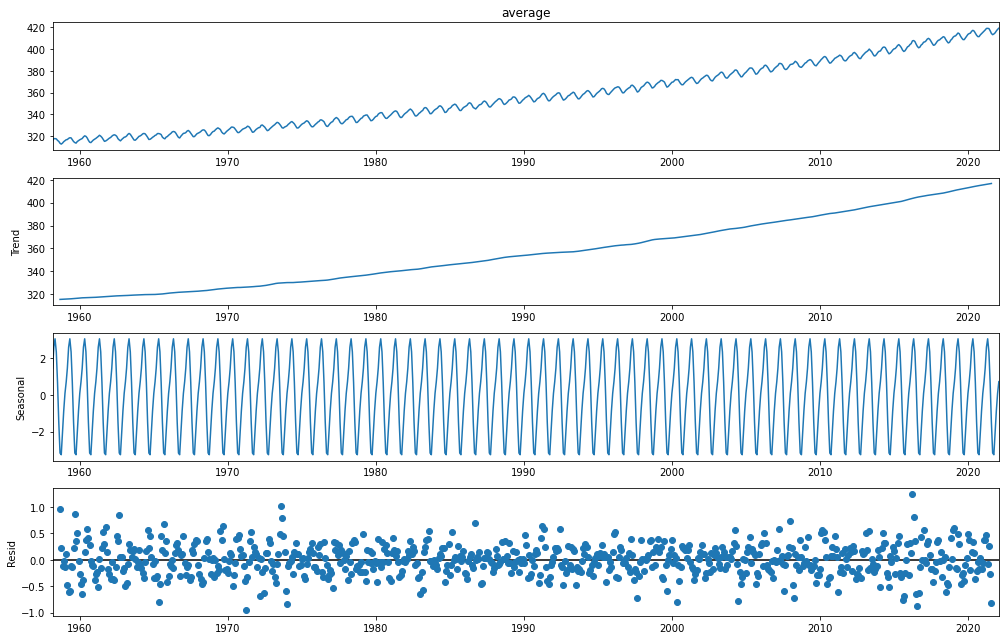

In [22]:
fig = result2.plot()
fig.set_size_inches((14, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

## Filter

In [23]:
filt_data = uniform_filter1d(co2.average, size=7)
co2['filtered'] = filt_data

<Figure size 432x288 with 0 Axes>

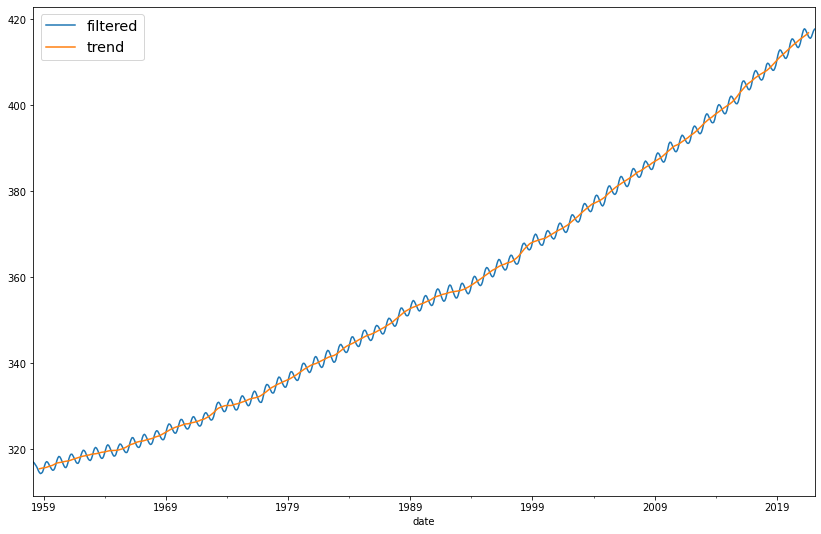

In [24]:
plt.clf()
fig = plt.figure()
ax = plt.gca()
_ = co2.filtered.plot(label='filtered')
result2.trend.plot(label='trend')
ax.legend(fontsize='x-large')
fig.set_size_inches((14, 9))
plt.show()